In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy as cp

In [4]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [5]:
#All of the columns are numbers.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


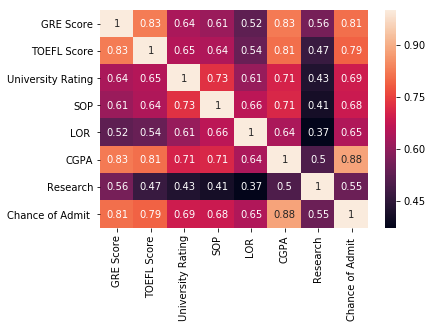

In [6]:
# Serial No no association with "Chance of Admit". Hence the columns is dropped.
df.drop(['Serial No.'], axis = 1, inplace=True)
df.corr()
sns.heatmap(df.corr(),annot=True)
#Below correlation matrix shows that GRE Score, TOEFL Score and CGPA have high correlation with Chance of Admit

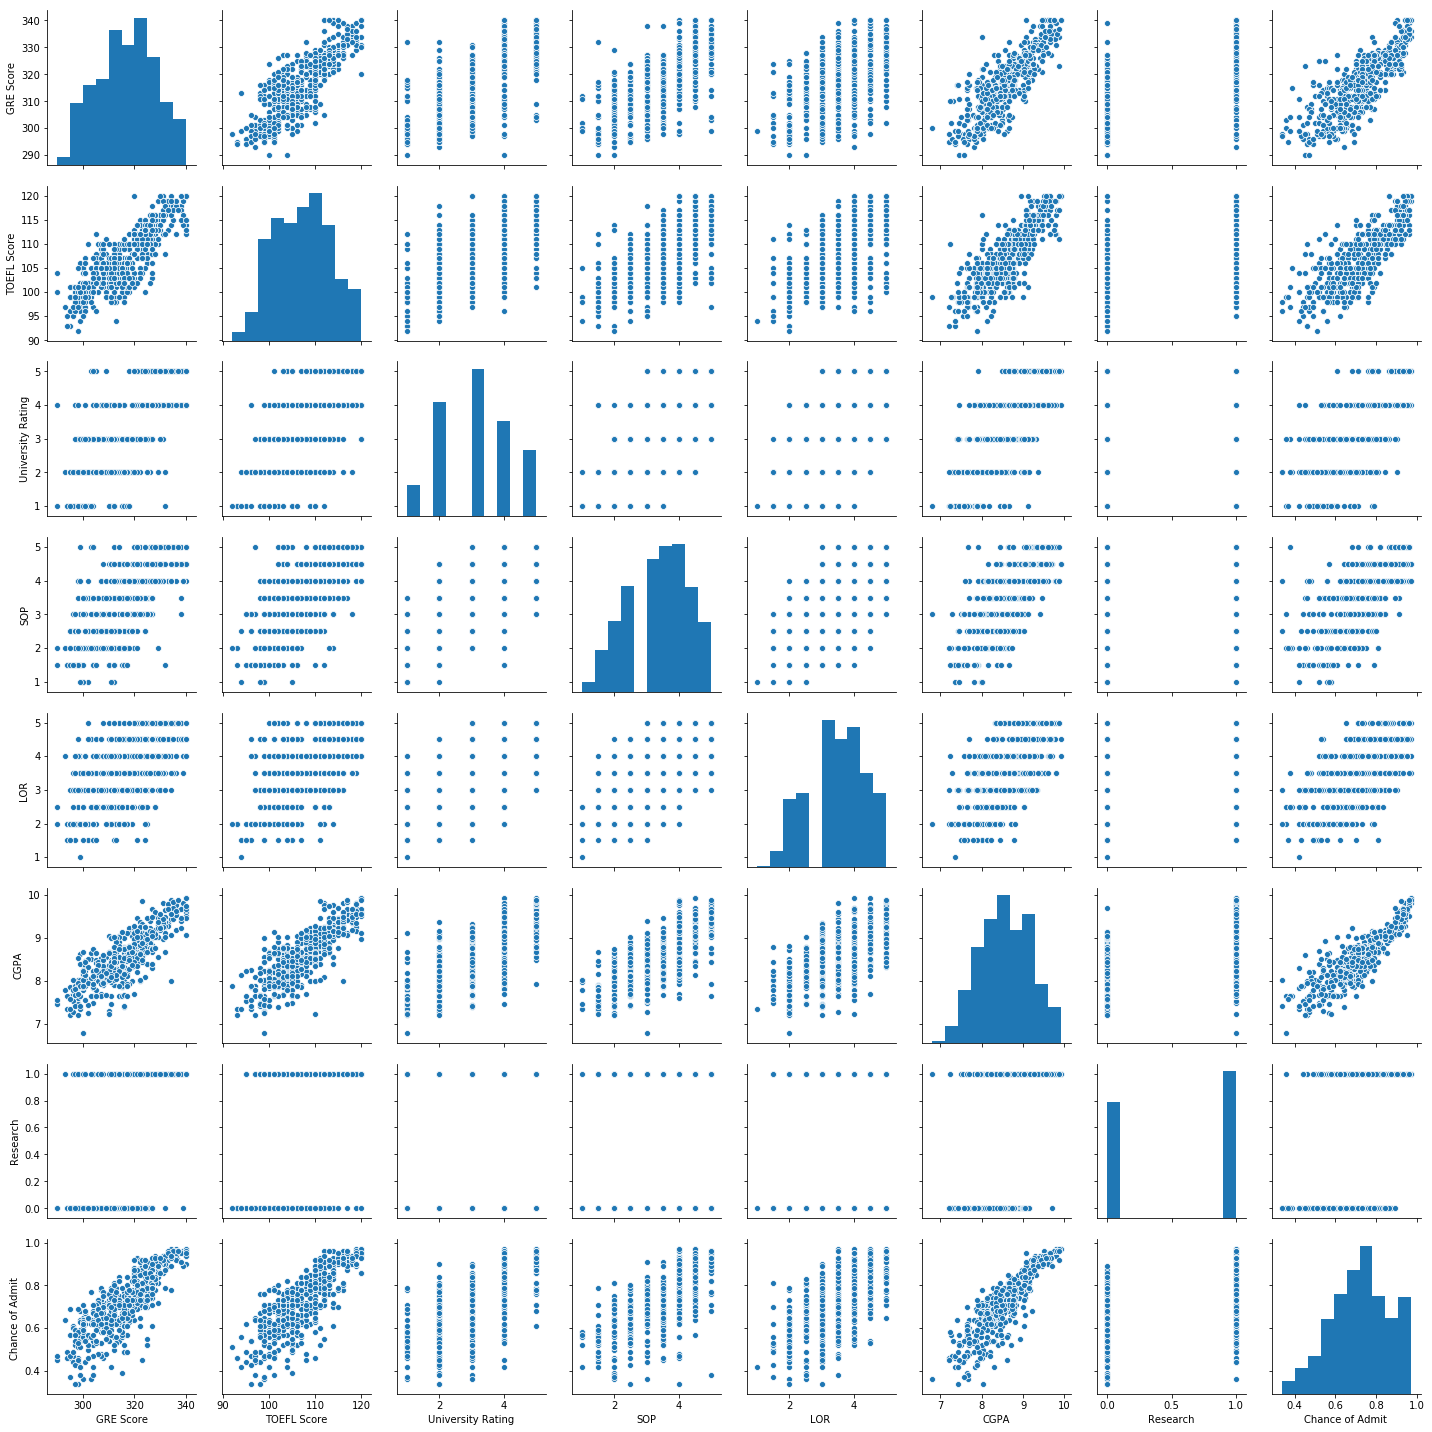

In [7]:
sns.pairplot(df)

# Below pair plot also shows that Chance of admission is increasing with increase in GRE score, TOEFL Score and CGPA. 
# Some of the columns like SOP, LOR and Univerdity Rating has discrete values and plotting is not showing much information.

In [8]:
# Whether Research is 1 or 0, in both cases "Chance of Admit" is good. Hence column has no relevance with the output.
# Hence the columns is dropped.
df.drop(['Research'], axis = 1, inplace=True)

In [11]:
# Separating features and outputs.
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]
y = df[['Chance of Admit ']]
# Creating copy of df such that actual df should not get modified. We can keep original df for reference.
df_mod = cp.deepcopy(df)

In [12]:
# Feature normaliztion is performed on all of required features such that all of them lie in same range. This is not required step.
# We saw descrete values in some columns and scores in some columns which are having very large difference.
# We will normalize the difference wuth feature scaling.
def feature_scaling(X):
    X_scale = np.matrix(X)
    X_mean = np.mean(X_scale, axis = 0)
    X_std = np.std(X_scale, axis = 0)
    print(X_mean)
    print(X_std)
    X_scale = (X_scale - X_mean)/X_std
    return X_scale

X_scale = feature_scaling(X)
i = np.size(df_mod, axis = 1)
for col in range(i-1):
    df_mod.iloc[:,col] = X_scale[:, col]
df_mod.head()

[[316.472   107.192     3.114     3.374     3.484     8.57644]]
[[11.28384757  6.07578275  1.14236772  0.99001212  0.92452366  0.60420768]]


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0.65


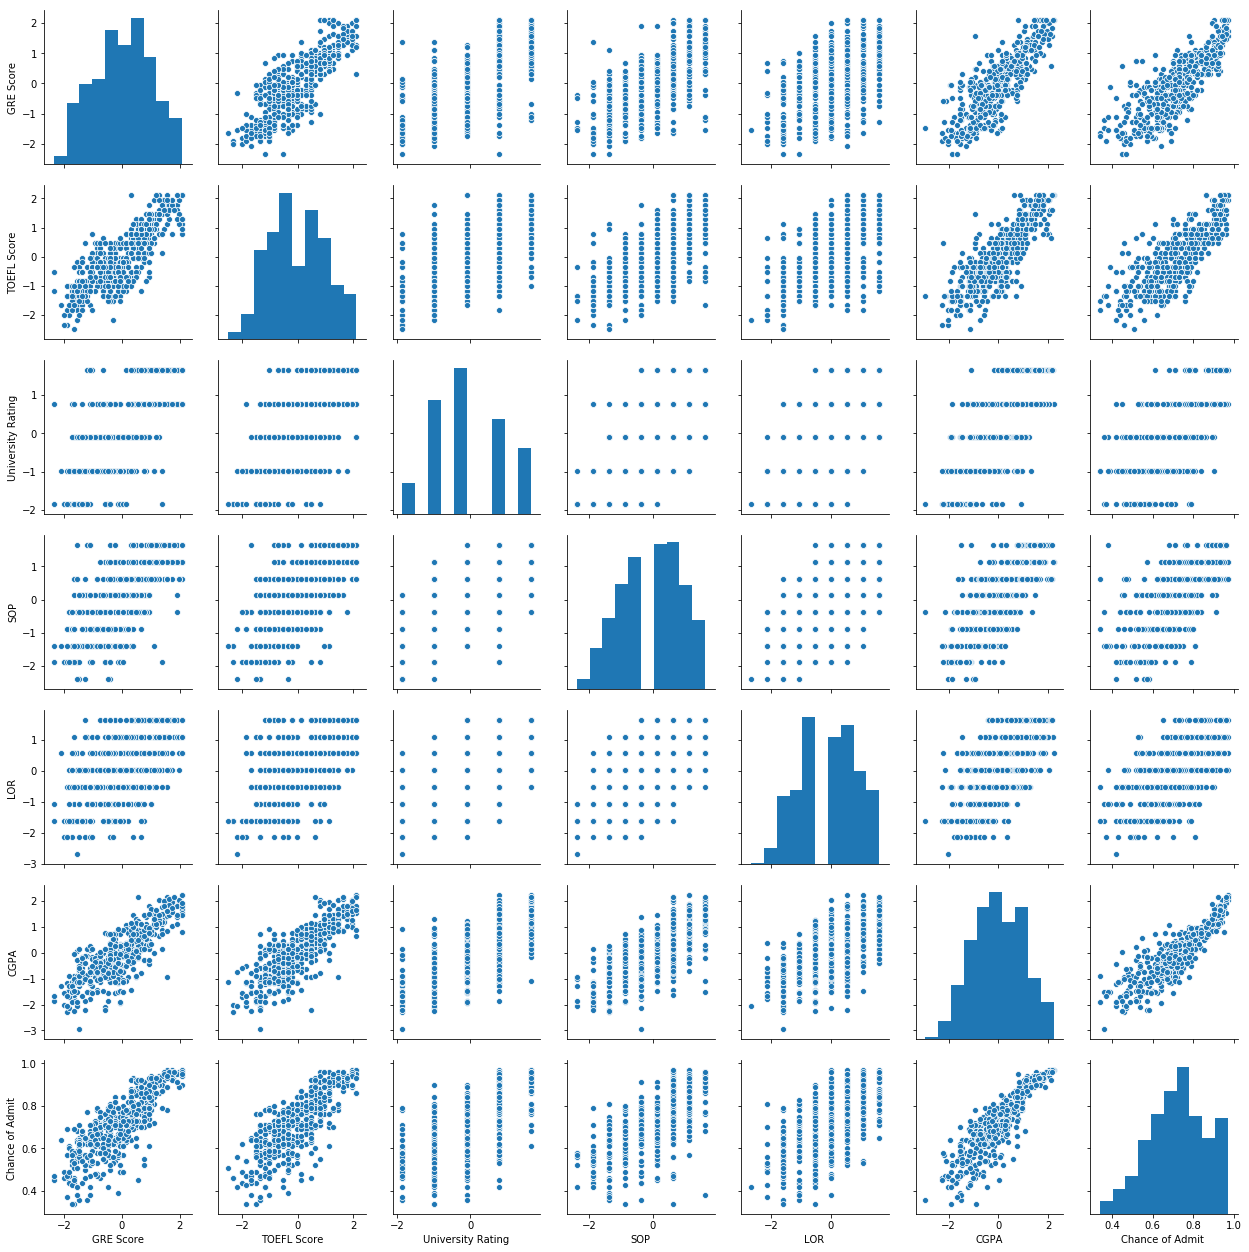

In [13]:
# Lets plot on feature scaled dataframe.
sns.pairplot(df_mod)
# We will see the same output. Hence, feature scaling is not useful for removing descrete values.

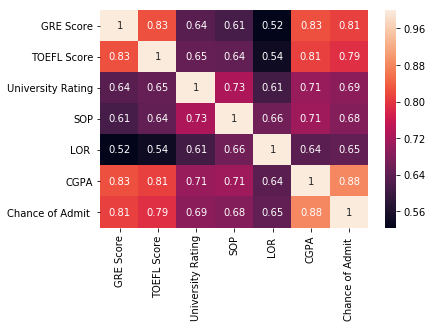

In [368]:
#Correlation matrix is also same.
sns.heatmap(df_mod.corr(),annot=True)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
def linear_model(X_train, y_train):
    global model  
    model.fit(X_train, y_train)
    r_sq = model.score(X_train, y_train)
    print('Model score: ', r_sq)
    print('Intercept: ', model.intercept_)
    print('Slope: ', model.coef_)

In [18]:
def pred_plot(X_test, y_test):
    y_pred = model.predict(X_test)
    plt.scatter(X_test.index, y_test, color ='green')
    plt.scatter(X_test.index, y_pred, color ='red')

Model score:  0.8140277661372727
Intercept:  [-1.46364447]
Slope:  [[0.00218578 0.00335844 0.11982612 0.00484042 0.02082871 0.00445256]]


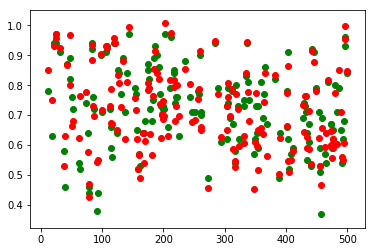

In [21]:
#Lets apply the Linear regression model on actual dataframe and scaled dataframe.
from sklearn.model_selection import train_test_split
X = df[['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ', 'University Rating']]
y = df[['Chance of Admit ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=121)
linear_model(X_train, y_train)
pred_plot(X_test, y_test)

Model score:  0.8135156894722485
Intercept:  [-1.49698702]
Slope:  [[0.00223328 0.00342014 0.12181632 0.00653292 0.0216283 ]]


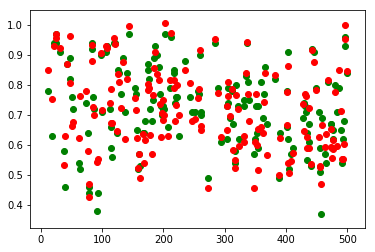

In [22]:
# Lets apply the Linear regression model on actual dataframe and scaled dataframe.
# I dont find university rating any helpful for the chance of admission.
from sklearn.model_selection import train_test_split
X = df[['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ']]
y = df[['Chance of Admit ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=121)
linear_model(X_train, y_train)
pred_plot(X_test, y_test)

Model score:  0.8135156894722486
Intercept:  [0.71854008]
Slope:  [[0.02519996 0.02078004 0.07360235 0.00646767 0.01999587]]


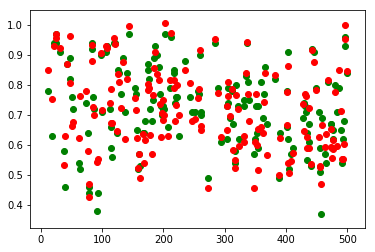

In [23]:
# Lets apply the Linear regression model on actual dataframe and scaled dataframe.
from sklearn.model_selection import train_test_split
X = df_mod[['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ']]
y = df_mod[['Chance of Admit ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=121)
linear_model(X_train, y_train)
pred_plot(X_test, y_test)
# This is based on scaled dataset and we can see that there is not change to the model performance.

In [24]:
# Lets try by adding more features to the dataset by using polynomials.
from sklearn.preprocessing import PolynomialFeatures

In [25]:
X_poly_train = pd.DataFrame(PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train))
X_poly_test = pd.DataFrame(PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test))

Model score:  0.8211011987143739
Intercept:  [0.71522765]
Slope:  [[ 0.02158012  0.01955611  0.07923488  0.0088428   0.01813027  0.01483405
   0.00096405 -0.0312433  -0.00513563  0.01189093 -0.00463059 -0.00483426
   0.01557448 -0.00597725  0.01689621  0.00810959 -0.01865454 -0.00802155
   0.00606185  0.00517243]]


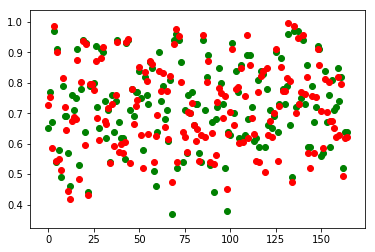

In [26]:
linear_model(X_poly_train, y_train)
pred_plot(X_poly_test, y_test)
#There is slight increase in the model score by adding degree 2. Lets try increasing the degree.

Model score:  0.87712261234801
Intercept:  [0.704325]
Slope:  [[-0.01933491  0.03497103  0.10491624 -0.01482362  0.01908252  0.0575068
   0.05191768 -0.05012034 -0.07147002  0.04593929 -0.0455947  -0.13172349
   0.15431067  0.00382106  0.08018014  0.02069557 -0.05427057 -0.02881554
  -0.04502461  0.04166541  0.01470452  0.0052639  -0.0876594   0.0077997
   0.00843124  0.05060922 -0.06740518  0.03560943 -0.02324638  0.15136049
  -0.02570863 -0.07013743  0.02162916 -0.03178215  0.04016725 -0.04846233
   0.10092268  0.00802752  0.00085263 -0.05410819 -0.1149132   0.04290401
  -0.00448171 -0.01724035  0.01210183 -0.0406642   0.0406449   0.03058338
   0.01890999  0.04780038 -0.06085467  0.01431915 -0.01664992 -0.00197347
   0.01290286 -0.07160238  0.08112775  0.18312015  0.08929672 -0.11472924
  -0.03089235 -0.07602238 -0.20076002  0.06987639 -0.19642854 -0.15004081
   0.23515571  0.05353836  0.02171397 -0.01817901 -0.04567208 -0.07500276
   0.2981269  -0.01433131  0.02432323  0.16337588  0

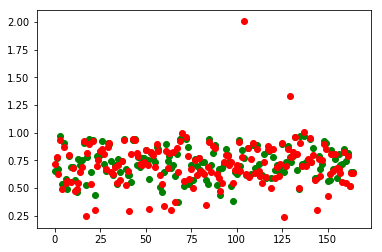

In [27]:
X_poly_train = pd.DataFrame(PolynomialFeatures(degree=4, include_bias=False).fit_transform(X_train))
X_poly_test = pd.DataFrame(PolynomialFeatures(degree=4, include_bias=False).fit_transform(X_test))
linear_model(X_poly_train, y_train)
pred_plot(X_poly_test, y_test)
# There is increase in the model fit. ALso, we also have few outliers too this time.

In [28]:
#Lets try linear regression other way.
import statsmodels.api as sm

In [29]:
X_sm_train = sm.add_constant(X_train)
X_sm_test = sm.add_constant(X_test)
type(X_sm_test)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


pandas.core.frame.DataFrame

In [30]:
# This method will provide detailed summary of model.
model = sm.OLS(y_train, X_sm_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     287.0
Date:                Mon, 02 Sep 2019   Prob (F-statistic):          1.24e-117
Time:                        17:30:01   Log-Likelihood:                 455.57
No. Observations:                 335   AIC:                            -899.1
Df Residuals:                     329   BIC:                            -876.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7185      0.003    209.478      

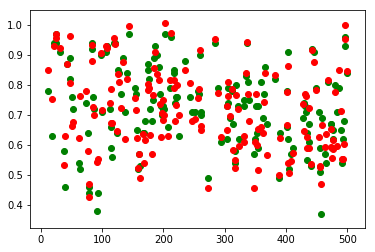

In [31]:
#Model fitting is similar to what we have dome earlier.
y_pred = results.predict(X_sm_test)
plt.scatter(X_sm_test.index, y_test, color ='green')
plt.scatter(X_sm_test.index, y_pred, color ='red')